In [ ]:
##pull cryptocurrencies prices from a public API and download them as Excel files,
## import two libraries first: requests (to pull data from the web) and pandas to process it.

In [2]:
import requests
import pandas as pd


In [3]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
## pull data from Bitcoin for the last 7 days

In [6]:
last_week = (pd.Timestamp.now() -  pd.offsets.Day(7))
last_week

Timestamp('2021-07-16 09:42:32.621435')

In [7]:
btc =  get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-07-16 10:00:00,31444.13,31528.65,31330.00,31415.02,48.617021,1.526923e+06
2021-07-16 11:00:00,31382.91,31461.23,31150.00,31324.98,141.525371,4.431123e+06
2021-07-16 12:00:00,31311.93,31311.93,31012.93,31088.15,123.098029,3.837395e+06
2021-07-16 13:00:00,31079.04,31786.27,31079.04,31701.69,169.173385,5.307785e+06
2021-07-16 14:00:00,31734.83,31977.45,31712.44,31771.78,134.933419,4.295794e+06


In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)


In [10]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-07-16 10:00:00,1871.74,1878.97,1861.39,1871.37,832.502950,1.557688e+06
2021-07-16 11:00:00,1868.54,1874.45,1848.13,1863.97,1325.615406,2.464645e+06
2021-07-16 12:00:00,1864.45,1869.73,1851.27,1851.27,683.519113,1.270976e+06
2021-07-16 13:00:00,1851.02,1894.84,1849.31,1890.69,768.978106,1.440425e+06
2021-07-16 14:00:00,1890.38,1916.64,1890.38,1898.11,860.845712,1.637274e+06


<AxesSubplot:xlabel='CloseTime'>

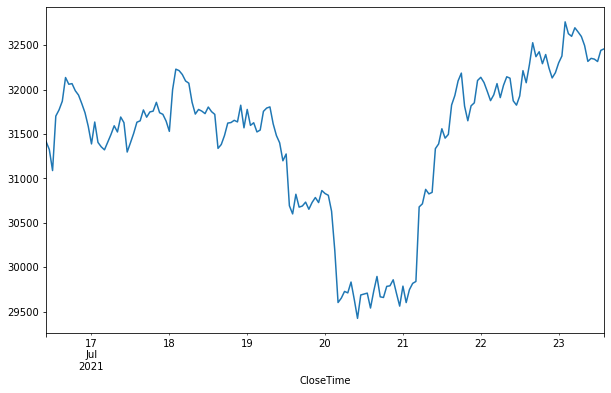

In [11]:
btc['ClosePrice'].plot(figsize=(10,6))

<AxesSubplot:xlabel='CloseTime'>

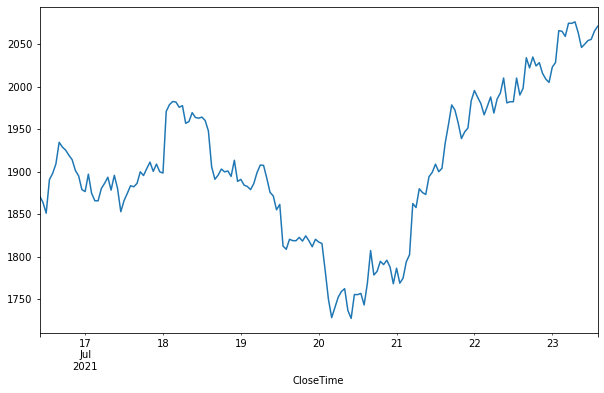

In [14]:
eth['ClosePrice'].plot(figsize=(10,6))

### Using Bokeh as dynamic plots
it is interactive plot that you can manipulate within the browser

In [19]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [20]:
output_notebook()

Loading BokehJS ...

In [27]:
p1 = figure(x_axis_type='datetime', title='Crypto Currency Prices', width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label='Date'
p1.yaxis.axis_label='Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
p1.legend.location='top_left'

show(p1)


In [28]:
writer = pd.ExcelWriter('cryptos.xlsx')

#### Make an excel file/cvs file using crypto data

In [29]:
btc.to_excel(writer, sheet_name='bitcoin')

In [30]:
eth.to_excel(writer, sheet_name='Ether')

In [32]:
writer.save()

C:\Users\zurie\anaconda3\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
